In [225]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import config 
from scipy.stats import norm

In [226]:
# get module variables
ROOT_DIR = config.ROOT_DIR
sns.set_style('whitegrid')

In [227]:
student_grades = pd.read_csv(rf"{ROOT_DIR}\data\student_grades.csv")

In [228]:
student_grades.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,111000.0
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


<AxesSubplot: title={'center': 'MBA Grade Distribution'}, ylabel='Frequency'>

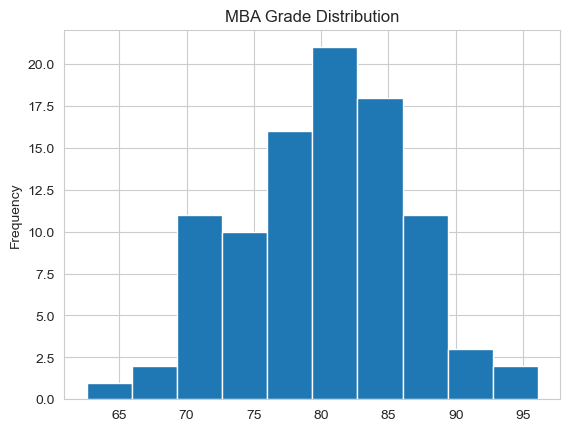

In [229]:
student_grades["MBA Grade"].plot(kind="hist", bins=10, title="MBA Grade Distribution")

<AxesSubplot: title={'center': 'MBA Grade Distribution'}, ylabel='Frequency'>

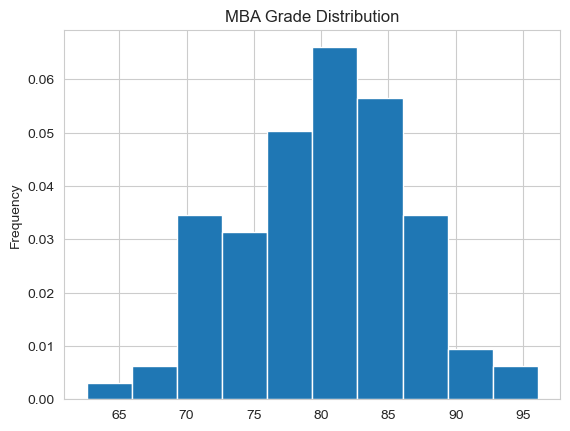

In [230]:
student_grades["MBA Grade"].plot(kind="hist", bins=10, title="MBA Grade Distribution", density=True)

In [231]:
mean_grades = student_grades["MBA Grade"].mean()
median_grades = student_grades["MBA Grade"].median()
std_dev_grades = student_grades["MBA Grade"].std()
print(f"Mean of MBA grade distribution: {mean_grades}")
print(f"Median of MBA grade distribution: {median_grades}")
print(f"Standard deviation of MBA grade distribution: {std_dev_grades}")

Mean of MBA grade distribution: 80.16947368421053
Median of MBA grade distribution: 80.2
Standard deviation of MBA grade distribution: 6.170780041112261


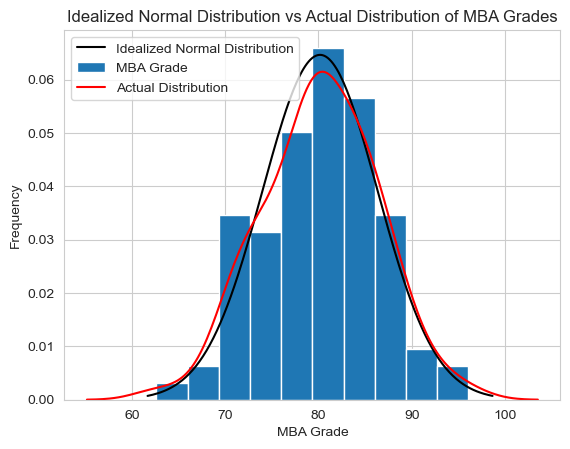

In [261]:
# based on mean and standard deviation of distribution of MBA grades plot an idealized normal distribution
def normal_dist(x, mean, std_dev):
    prob_density_func = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std_dev)**2)
    return prob_density_func

# get theoretical series of data points within 3 standard deviations of mean
x = np.linspace(mean_grades - 3*std_dev_grades, mean_grades + 3*std_dev_grades, 200)

prob_density_func = normal_dist(x, mean_grades, std_dev_grades)

# plot theoretical normal distribution
plt.plot(x, prob_density_func, color="black", label="Idealized Normal Distribution")

# plot title of distribution
plt.xlabel("MBA Grade")
plt.ylabel("Probability Density")

student_grades["MBA Grade"].plot(kind="hist", bins=10, density=True)

# plot smooth curve of actual distribution of MBA grades
sns.kdeplot(student_grades["MBA Grade"], color="red", legend=True, label="Actual Distribution")

plt.title("Idealized Normal Distribution vs Actual Distribution of MBA Grades")

plt.legend()
plt.show()

In [233]:
# get Z Score MBA Grade for each student
student_grades["Z Score MBA Grade"] = (student_grades["MBA Grade"] - mean_grades)/std_dev_grades
student_grades.loc[:, ["Student ID", "MBA Grade", "Z Score MBA Grade"]]

,Student ID,MBA Grade,Z Score MBA Grade
0,1,90.2,1.625488
1,2,92.8,2.046828
2,3,68.7,-1.858675
3,4,80.7,0.085974
4,5,74.9,-0.853940
...,...,...,...
90,91,77.9,-0.367777
91,92,86.1,0.961066
92,93,89.9,1.576871
93,94,83.1,0.474904


In [234]:
# verify MBA grade distribution is normal - if it follows empirical rule approximately
# 68% of data points should be within 1 standard deviation of mean
# 95% of data points should be within 2 standard deviations of mean
# 99.7% of data points should be within 3 standard deviations of mean

# get number of data points within 1 standard deviation of mean
num_within_1_std_dev = student_grades.loc[(student_grades["Z Score MBA Grade"] >= -1) & (student_grades["Z Score MBA Grade"] <= 1), "Z Score MBA Grade"].count()
print(f"Number of data points within 1 standard deviation of mean: {num_within_1_std_dev}")

# get percentage of data points within 1 standard deviation of mean
percent_within_1_std_dev = num_within_1_std_dev/student_grades["Z Score MBA Grade"].count()
print(f"Percentage of data points within 1 standard deviation of mean: {percent_within_1_std_dev}")

# get number of data points within 2 standard deviations of mean
num_within_2_std_dev = student_grades.loc[(student_grades["Z Score MBA Grade"] >= -2) & (student_grades["Z Score MBA Grade"] <= 2), "Z Score MBA Grade"].count()
print(f"Number of data points within 2 standard deviations of mean: {num_within_2_std_dev}")

# get percentage of data points within 2 standard deviations of mean
percent_within_2_std_dev = num_within_2_std_dev/student_grades["Z Score MBA Grade"].count()
print(f"Percentage of data points within 2 standard deviations of mean: {percent_within_2_std_dev}")

# get number of data points within 3 standard deviations of mean
num_within_3_std_dev = student_grades.loc[(student_grades["Z Score MBA Grade"] >= -3) & (student_grades["Z Score MBA Grade"] <= 3), "Z Score MBA Grade"].count()
print(f"Number of data points within 3 standard deviations of mean: {num_within_3_std_dev}")


# get percentage of data points within 3 standard deviations of mean
percent_within_3_std_dev = num_within_3_std_dev/student_grades["Z Score MBA Grade"].count()
print(f"Percentage of data points within 3 standard deviations of mean: {percent_within_3_std_dev}")

Number of data points within 1 standard deviation of mean: 66
Percentage of data points within 1 standard deviation of mean: 0.6947368421052632
Number of data points within 2 standard deviations of mean: 90
Percentage of data points within 2 standard deviations of mean: 0.9473684210526315
Number of data points within 3 standard deviations of mean: 95
Percentage of data points within 3 standard deviations of mean: 1.0


#### Get upper and lower bounds of idealized normal distribution for aforementioned parameters for MBA grade

In [235]:
# get upper and lower bounds for 1 standard deviation of mean
upper_bound_1_std_dev = mean_grades + std_dev_grades
lower_bound_1_std_dev = mean_grades - std_dev_grades
lower_bound_1_std_dev, upper_bound_1_std_dev

(73.99869364309826, 86.3402537253228)

In [236]:
# get upper and lower bounds for 2 standard deviations of mean
upper_bound_2_std_dev = mean_grades + 2*std_dev_grades
lower_bound_2_std_dev = mean_grades - 2*std_dev_grades
lower_bound_2_std_dev, upper_bound_2_std_dev

(67.82791360198601, 92.51103376643505)

In [237]:
# get upper and lower bounds for 3 standard deviations of mean
upper_bound_3_std_dev = mean_grades + 3*std_dev_grades
lower_bound_3_std_dev = mean_grades - 3*std_dev_grades
lower_bound_3_std_dev, upper_bound_3_std_dev

(61.657133560873746, 98.68181380754731)

#### What is the probability of getting a grade of 70 or below?

In [238]:
norm.cdf(70, mean_grades, std_dev_grades)

0.049675867098227966

#### What is the probability of graduate getting score that is 1 standard deviation from the mean at the most?

In [239]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

#### Client is looking to classify any students that receive final grade greater than 90 as honor student. What is the probability of a student being classified as honor student? 

In [240]:
1 - norm.cdf(90, mean_grades, std_dev_grades)

0.05557148533193279

#### Do annual salary of graduates follow a normal distribution?

In [241]:
# get mean, median, standard deviation of Annual Salary
mean_annual_salary = student_grades["Annual Salary"].mean()
std_dev_annual_salary = student_grades["Annual Salary"].std()
median_annual_salary = student_grades["Annual Salary"].median()

print(rf"Mean of Annual Salary: {mean_annual_salary}")
print(rf"Median of Annual Salary: {median_annual_salary}")
print(rf"Standard deviation of Annual Salary: {std_dev_annual_salary}")

Mean of Annual Salary: 119386.7924528302
Median of Annual Salary: 104500.0
Standard deviation of Annual Salary: 45546.95817647072


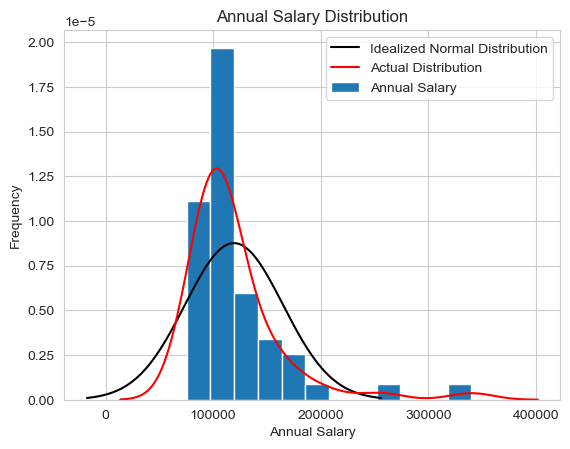

In [281]:
# based on mean and standard deviation of distribution of MBA grades plot an idealized normal distribution
def normal_dist(x, mean, std_dev):
    prob_density_func = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std_dev)**2)
    return prob_density_func

# get theoretical series of data points within 3 standard deviations of mean
x = np.linspace(mean_annual_salary - 3*std_dev_annual_salary, mean_annual_salary + 3*std_dev_annual_salary, 200)

prob_density_func = normal_dist(x, mean_annual_salary, std_dev_annual_salary)

# plot theoretical normal distribution
plt.plot(x, prob_density_func, color="black", label="Idealized Normal Distribution")

# plot gaussian curve of actual distribution of Annual Salary
sns.kdeplot(student_grades["Annual Salary"], color="red", legend=True, label="Actual Distribution")

# plot title of distribution
plt.title("Idealized Normal Distribution")
plt.xlabel("Annual Salary")
plt.ylabel("Probability Density")

student_grades["Annual Salary"].plot(kind="hist", bins=12, title="Annual Salary Distribution", density=True)

plt.legend()
plt.show()

In [243]:
# get Z Score Annual Salary for each student
student_grades["Z Score Annual Salary"] = (student_grades["Annual Salary"] - mean_annual_salary)/std_dev_annual_salary
student_grades.loc[:, ["Student ID", "Annual Salary", "Z Score Annual Salary"]]

,Student ID,Annual Salary,Z Score Annual Salary
0,1,111000.0,-0.184135
1,2,NaN,NaN
2,3,107000.0,-0.271957
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
90,91,99500.0,-0.436622
91,92,107000.0,-0.271957
92,93,NaN,NaN
93,94,84000.0,-0.776930


#### Get upper and lower bounds of idealized normal distribution for aforementioned parameters for Annual Salary

In [244]:
# verify Annual Salary distribution is normal - if it follows empirical rule approximately
# 68% of data points should be within 1 standard deviation of mean
# 95% of data points should be within 2 standard deviations of mean
# 99.7% of data points should be within 3 standard deviations of mean

# get number of data points within 1 standard deviation of mean
num_within_1_std_dev = student_grades.loc[(student_grades["Z Score Annual Salary"] >= -1) & (student_grades["Z Score Annual Salary"] <= 1), "Z Score Annual Salary"].count()
print(f"Number of data points within 1 standard deviation of mean: {num_within_1_std_dev}")

# get percentage of data points within 1 standard deviation of mean
percent_within_1_std_dev = num_within_1_std_dev/student_grades["Z Score Annual Salary"].count()
print(f"Percentage of data points within 1 standard deviation of mean: {percent_within_1_std_dev}")

# get number of data points within 2 standard deviations of mean
num_within_2_std_dev = student_grades.loc[(student_grades["Z Score Annual Salary"] >= -2) & (student_grades["Z Score Annual Salary"] <= 2), "Z Score Annual Salary"].count()
print(f"Number of data points within 2 standard deviations of mean: {num_within_2_std_dev}")

# get percentage of data points within 2 standard deviations of mean
percent_within_2_std_dev = num_within_2_std_dev/student_grades["Z Score Annual Salary"].count()
print(f"Percentage of data points within 2 standard deviations of mean: {percent_within_2_std_dev}")

# get number of data points within 3 standard deviations of mean
num_within_3_std_dev = student_grades.loc[(student_grades["Z Score Annual Salary"] >= -3) & (student_grades["Z Score Annual Salary"] <= 3), "Z Score Annual Salary"].count()
print(f"Number of data points within 3 standard deviations of mean: {num_within_3_std_dev}")

# get percentage of data points within 3 standard deviations of mean
percent_within_3_std_dev = num_within_3_std_dev/student_grades["Z Score Annual Salary"].count()
print(f"Percentage of data points within 3 standard deviations of mean: {percent_within_3_std_dev}")

Number of data points within 1 standard deviation of mean: 47
Percentage of data points within 1 standard deviation of mean: 0.8867924528301887
Number of data points within 2 standard deviations of mean: 51
Percentage of data points within 2 standard deviations of mean: 0.9622641509433962
Number of data points within 3 standard deviations of mean: 52
Percentage of data points within 3 standard deviations of mean: 0.9811320754716981


##### From above plot and metrics it seems too large a number of data points for annual salary are concentrated within 1 standard deviation of mean for it to be a normal distribution. Hence, we can assume that annual salary of graduates does not follow a normal distribution.

#### Get upper and lower bounds of idealized normal distribution for aforementioned parameters for Annual Salary

In [245]:
# get upper and lower bounds for 1 standard deviation of mean
upper_bound_1_std_dev = mean_annual_salary + std_dev_annual_salary
lower_bound_1_std_dev = mean_annual_salary - std_dev_annual_salary
lower_bound_1_std_dev, upper_bound_1_std_dev

(73839.83427635947, 164933.75062930092)

In [246]:
# get upper and lower bounds for 2 standard deviations of mean
upper_bound_2_std_dev = mean_annual_salary + 2*std_dev_annual_salary    
lower_bound_2_std_dev = mean_annual_salary - 2*std_dev_annual_salary
lower_bound_2_std_dev, upper_bound_2_std_dev

(28292.87609988876, 210480.70880577163)

In [247]:
# get upper and lower bounds for 3 standard deviations of mean
upper_bound_3_std_dev = mean_annual_salary + 3*std_dev_annual_salary
lower_bound_3_std_dev = mean_annual_salary - 3*std_dev_annual_salary
lower_bound_3_std_dev, upper_bound_3_std_dev

(-17254.082076581966, 256027.66698224237)